# Importing necessary libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Loading the data

In [2]:
movies_data = pd.read_csv('movies.csv')
sample_data = pd.read_csv('sample.csv')
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

# Copying the data for further manipulation

In [3]:
movie_copy = movies_data 
test_copy = test 
train_copy = train

# Movies_data

In [4]:
movie_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143258 entries, 0 to 143257
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   movieid               143258 non-null  object 
 1   title                 143258 non-null  object 
 2   audienceScore         73248 non-null   float64
 3   rating                13991 non-null   object 
 4   ratingContents        13991 non-null   object 
 5   releaseDateTheaters   30773 non-null   object 
 6   releaseDateStreaming  79420 non-null   object 
 7   runtimeMinutes        129431 non-null  float64
 8   genre                 132175 non-null  object 
 9   originalLanguage      129400 non-null  object 
 10  director              143258 non-null  object 
 11  boxOffice             14743 non-null   object 
 12  distributor           23001 non-null   object 
 13  soundType             15917 non-null   object 
dtypes: float64(2), object(12)
memory usage: 15.3+ MB


In [5]:
movie_copy.describe()

,audienceScore,runtimeMinutes
count,73248.000000,129431.000000
mean,55.674967,93.708578
std,24.553648,28.129175
min,0.000000,1.000000
25%,37.000000,84.000000
50%,57.000000,92.000000
75%,76.000000,103.000000
max,100.000000,2700.000000


In [6]:
movie_copy.isna().sum()

movieid                      0
title                        0
audienceScore            70010
rating                  129267
ratingContents          129267
releaseDateTheaters     112485
releaseDateStreaming     63838
runtimeMinutes           13827
genre                    11083
originalLanguage         13858
director                     0
boxOffice               128515
distributor             120257
soundType               127341
dtype: int64

- Here, we can see that there are more than 1,00,000 null entries. Because the majority of the data will be synthetic, imputing these values to train our model will result in biassed predictions. Thus, we shall remove these columns.

In [7]:
movies_duplicate = movie_copy.duplicated()

# Get the rows that are duplicates
duplicate_rows = movie_copy[movies_duplicate]

# Display the duplicate rows
duplicate_rows

,movieid,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
1126,escape_the_terminator_tyler_durden_astonish,Escape The Terminator Tyler Durden Astonish,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Joseph Brooks,NaN,NaN,NaN
3772,supreme_indiana_jones,Supreme Indiana Jones,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Augusta Daniel,NaN,NaN,NaN
5048,escape_the_terminator_tyler_durden_astonish,Escape The Terminator Tyler Durden Astonish,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Joseph Brooks,NaN,NaN,NaN
7364,escape_the_terminator_tyler_durden_astonish,Escape The Terminator Tyler Durden Astonish,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Joseph Brooks,NaN,NaN,NaN
8012,holly_golightly_enthralling,Holly Golightly Enthralling,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Augusta Daniel,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140598,cosmic_jack_torrance_ellis_redding_indiana_jones,Cosmic Jack Torrance Ellis Redding Indiana Jones,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Augusta Daniel,NaN,NaN,NaN
140654,the_bride_hannibal_lecter_enigma_black_widow,The Bride Hannibal Lecter Enigma Black Widow,NaN,NaN,NaN,NaN,NaN,89.0,Drama,English,Raul Glover,NaN,NaN,NaN
141470,wolverine_tony_montana_wolverine,Wolverine Tony Montana Wolverine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Augusta Daniel,NaN,NaN,NaN
142468,escape_the_terminator_tyler_durden_astonish,Escape The Terminator Tyler Durden Astonish,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Joseph Brooks,NaN,NaN,NaN


## Summary of the movies dataset

> The columns : **'rating','ratingContents','releaseDateTheaters','boxOffice','distributor','soundType'** have over **1,00,000** null values and imputing these columns might be a bad idea. 

> **Removing** them would be a better idea. 


> There are **1571 duplicate** entries in the dataset. 

# Exploratory Data Analysis & Data pre-processing

# Train Dataset

In [8]:
train_copy

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment
0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,POSITIVE
1,tony_montana_frodo_baggins_v_rocky_balboa,Felicia Lopez,False,With a cast that reads like the Vogue Oscar pa...,NEGATIVE
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,Mr. Charles Burgess,True,Creed II does not give us anything but another...,POSITIVE
3,lara_croft_glimmer,Ryan Barrett,False,"I know what you're thinking, but this is no Li...",POSITIVE
4,jason_bourne_surreal_the_terminator_indiana_jones,Alexander Glover,False,Director Fernando Meirelles tells the story wi...,POSITIVE
...,...,...,...,...,...
162753,the_joker_ethereal_captain_jack_sparrow_fantastic,Danny Mueller,False,A top-notch thriller with genuine surprises an...,POSITIVE
162754,e.t._hannibal_lecter_vito_corleone_katniss_eve...,Jennifer Clayton,True,Some people find Derek Zoolander funny and lik...,NEGATIVE
162755,infinite_enigma_luke_skywalker,Bryan Wilson,False,"This fun, gentle comedy focuses mainly on them...",POSITIVE
162756,emerald_oracle_iron_man_wolverine,Erik Parker,False,"The film is rescued by a strong third act, but...",NEGATIVE


In [9]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162758 entries, 0 to 162757
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   movieid             162758 non-null  object
 1   reviewerName        162758 non-null  object
 2   isFrequentReviewer  162758 non-null  bool  
 3   reviewText          156311 non-null  object
 4   sentiment           162758 non-null  object
dtypes: bool(1), object(4)
memory usage: 5.1+ MB


In [10]:
train_copy.describe()

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment
count,162758,162758,162758,156311,162758
unique,16812,4482,2,155071,2
top,escape_the_terminator_tyler_durden_astonish,Sherri Morrison,False,Parental Content Review,POSITIVE
freq,708,962,113189,29,108761


In [11]:
train['sentiment'].value_counts()


sentiment
POSITIVE    108761
NEGATIVE     53997
Name: count, dtype: int64

In [12]:
missing_train = train_copy.isna().sum()
missing_train

movieid                  0
reviewerName             0
isFrequentReviewer       0
reviewText            6447
sentiment                0
dtype: int64

- We see that there are **6447** null entries in our train dataset.

In [13]:
missing_train_percent = missing_train/len(train)*100

print("Hence we see that the percentage of missing train['reviewText'] data  is:",missing_train_percent['reviewText'])

Hence we see that the percentage of missing train['reviewText'] data  is: 3.9610956143476814


In [14]:
reviewer_counts=train_copy[train_copy['isFrequentReviewer'] == True]['reviewerName'].value_counts()
reviewer_counts

reviewerName
John Luna            783
Bryan Phillips       677
Daniel Schneider     656
Don Hodges           597
Robert Faulkner      503
                    ... 
Cynthia Dalton         1
Natalie Sloan          1
Terry Roach            1
Michael Gutierrez      1
Chad Mueller           1
Name: count, Length: 1460, dtype: int64

- From above result we have **John Luna** who has reviewed the most, followed by **Bryan Phillips**

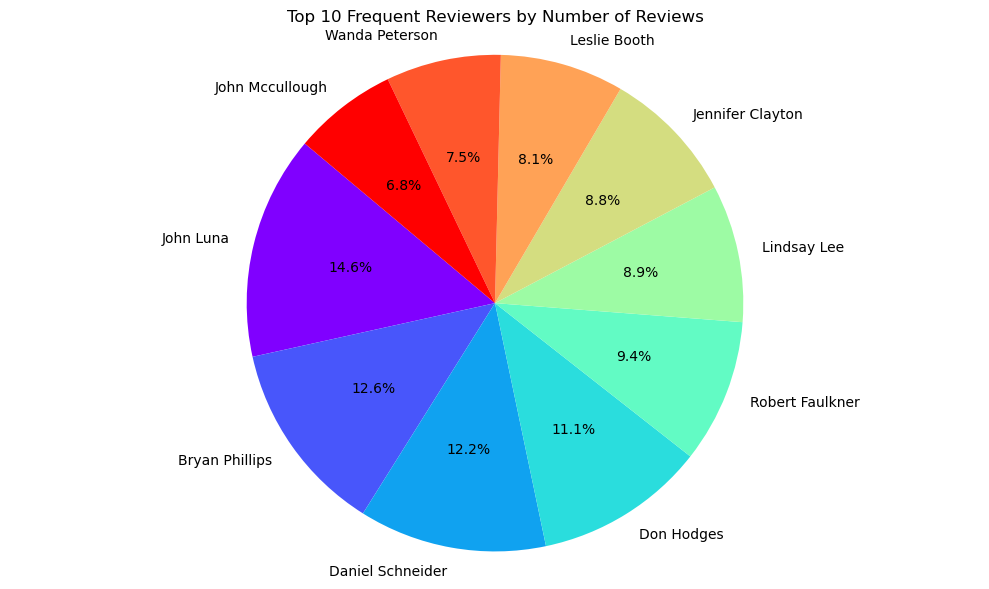

In [15]:
# Selecting the top 10 reviewers
top_10_reviewers = reviewer_counts.head(10)

# Creating the pie chart
plt.figure(figsize=(10, 6))
plt.pie(top_10_reviewers.values, labels=top_10_reviewers.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.rainbow(np.linspace(0, 1, len(top_10_reviewers))))
plt.title('Top 10 Frequent Reviewers by Number of Reviews')
# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')  
plt.tight_layout()
plt.show()

In [16]:
# Now let us look at the imbalance in the sentiment if there's any present

sentiment_count = train_copy['sentiment'].value_counts()
sentiment_count


sentiment
POSITIVE    108761
NEGATIVE     53997
Name: count, dtype: int64

In [17]:
sentiment_percent = sentiment_count/len(train) * 100
sentiment_percent

sentiment
POSITIVE    66.823751
NEGATIVE    33.176249
Name: count, dtype: float64

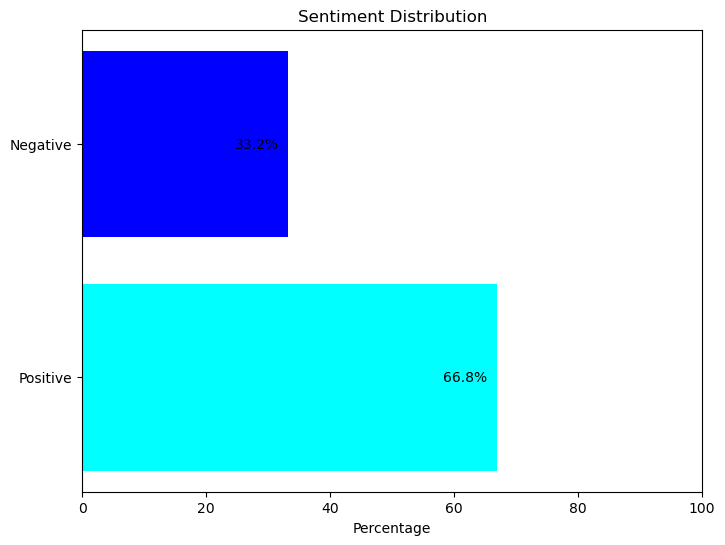

In [18]:
# Data for the horizontal bar chart
labels = ['Positive', 'Negative']
sizes = [66.823751, 33.176249]
colors = ['cyan', 'Blue']

# Create the horizontal bar chart
plt.figure(figsize=(8, 6))
bars = plt.barh(labels, sizes, color=colors)
plt.xlabel('Percentage')
plt.title('Sentiment Distribution')
plt.xlim(0, 100) 

# Add percentage labels on the bars
for bar, size in zip(bars, sizes):
    plt.text(bar.get_width() - 5, bar.get_y() + bar.get_height() / 2,
             f'{size:.1f}%', ha='center', va='center', color='black')

plt.show()


- There's almost twice as much of POSTIVE sentimented reviews versus NEGATIVE sentimented reviews. This suggests class imbalance. 
- Applying class imbalance techniques like **SMOTE, RandomOverSampler, RandomUnderSampler or ADYSN** might be a good idea.

# Summary of Train dataset

> We have a total of **162758** entries in train dataset. Of these, there are **16812** unique **movieid** and there are **4482** unique reviewerName.

> About **3.9610 %** of reviewName column has null values.

> **John Luna** has reviewed the most, followed by **Bryan Phillips**

> The train dataset is **imbalanced** with **66.823751% Positive** sentiment reviews and **33.176249% Negative** sentimented reviews

# Test Dataset

In [19]:
test_copy

,movieid,reviewerName,isTopCritic,reviewText
0,legend_marty_mcfly_oracle,John Kim,False,Green slowly cranks up the dread with style an...
1,terminator_katniss_everdeen_glimmer,Brian Chaney,False,Philip Noyce's direction is elegant and unforc...
2,james_bond_labyrinth_gollum,Danielle Parker,False,It wouldn't do to say what path Maria ultimate...
3,v_quest_han_solo_wondrous,Brittany Lane,False,Pig is not exactly the arthouse John Wick that...
4,enigma_hulk_surreal_starlight,Justin Willis,False,An imaginative no-budget musical of sorts abou...
...,...,...,...,...
55310,celestial_radiant,Jose Mccormick,False,Ron Howard delivers an unconventional romantic...
55311,vivid_james_t._kirk,Thomas Osborne,False,As an oddball art film that openly invites you...
55312,scarlett_o'hara_neo_scarlett_o'hara_infinite,Julie Kirby,False,Nicholson wears his devilish grin from his fir...
55313,terminator_epic_rocky_balboa_mystic,Tina Sutton,True,It's hard not be entertained by two dozen of C...


In [20]:
missing_test = test_copy.isna().sum()
missing_test

movieid            0
reviewerName       0
isTopCritic        0
reviewText      2510
dtype: int64

In [21]:
missing_test_percent = missing_test/len(train)*100

print("Hence we see that the percentage of missing test['reviewText'] data  is:",missing_test_percent['reviewText'])

Hence we see that the percentage of missing test['reviewText'] data  is: 1.542166898094103


# Summary of Test dataset

> The dataset has a shape of **(55315,4)**.

> About **2510** entries or **1.542%** of reviewName column has null values.

# Data Pre-Processing

In [22]:
#Initially we will encode the sentiment column in train dataset

label_encoder = LabelEncoder()
train_copy['sentiment'] = label_encoder.fit_transform(train_copy['sentiment'])

In [23]:
train_copy['isFrequentReviewer'] = label_encoder.fit_transform(train_copy['isFrequentReviewer'])

In [24]:
#Filling in the missing values

train_copy['reviewText'].fillna('missing', inplace=True)
train_copy.isna().sum()

movieid               0
reviewerName          0
isFrequentReviewer    0
reviewText            0
sentiment             0
dtype: int64

In [25]:
# Applying similar techniques for the test dataset

test_copy['reviewText'].fillna('missing', inplace=True)
test_copy.isna().sum()

movieid         0
reviewerName    0
isTopCritic     0
reviewText      0
dtype: int64

# Pre-Processing function

In [26]:
# Function to cleanup the review column to prepare it for modeling
def clean_review(review):
    # Convert the review to lowercase
    review = str(review).lower()
    
    # Remove URLs
    review = re.sub(r'https?://\S+', '', review)
    
    # Remove HTML tags
    review = re.sub(r'<[^>]*>', '', review)
    
    # Remove newlines
    review = re.sub('\n', ' ', review)
    
    # Remove alphanumeric words and single letters
    review = re.sub(r'\b\w\b', '', review)
    
    # Remove punctuation, excluding specific characters
    review = re.sub(r'[^\w\s!@$%^&*(),.?":{}|<>]', '', review)
    
    # Remove numbers and apostrophes
    review = re.sub(r'\b\d+\b', '', review)
    review = re.sub(r"'", '', review)

    return review


# For train DataFrame
train_copy['reviewText'] = train_copy['reviewText'].apply(lambda x: clean_review(x))

In [27]:
# Define a function to remove stop words from the reviewText column

stop_words = ["0o","0s","3a","3b","3d","6b","6o","a","a1","a2","a3","a4","ab","able","about","above","abst","ac","accordance","according","accordingly","across","act","actually","ad","added","adj","ae","af","affected","affecting","affects","after","afterwards","ag","again","against","ah","ain","ain't","aj","al","all","allow","allows","almost","alone","along","already","also","although","always","am","among","amongst","amoungst","amount","an","and","announce","another","any","anybody","anyhow","anymore","anyone","anything","anyway","anyways","anywhere","ao","ap","apart","apparently","appear","appreciate","appropriate","approximately","ar","are","aren","arent","aren't","arise","around","as","a's","aside","ask","asking","associated","at","au","auth","av","available","aw","away","awfully","ax","ay","az","b","b1","b2","b3","ba","back","bc","bd","be","became","because","become","becomes","becoming","been","before","beforehand","begin","beginning","beginnings","begins","behind","being","believe","below","beside","besides","best","better","between","beyond","bi","bill","biol","bj","bk","bl","bn","both","bottom","bp","br","brief","briefly","bs","bt","bu","but","bx","by","c","c1","c2","c3","ca","call","came","can","cannot","cant","can't","cause","causes","cc","cd","ce","certain","certainly","cf","cg","ch","changes","ci","cit","cj","cl","clearly","cm","c'mon","cn","co","com","come","comes","con","concerning","consequently","consider","considering","contain","containing","contains","corresponding","could","couldn","couldnt","couldn't","course","cp","cq","cr","cry","cs","c's","ct","cu","currently","cv","cx","cy","cz","d","d2","da","date","dc","dd","de","definitely","describe","described","despite","detail","df","di","did","didn","didn't","different","dj","dk","dl","do","does","doesn","doesn't","doing","don","done","don't","down","downwards","dp","dr","ds","dt","du","due","during","dx","dy","e","e2","e3","ea","each","ec","ed","edu","ee","ef","effect","eg","ei","eight","eighty","either","ej","el","eleven","else","elsewhere","em","empty","en","end","ending","enough","entirely","eo","ep","eq","er","es","especially","est","et","et-al","etc","eu","ev","even","ever","every","everybody","everyone","everything","everywhere","ex","exactly","example","except","ey","f","f2","fa","far","fc","few","ff","fi","fifteen","fifth","fify","fill","find","fire","first","five","fix","fj","fl","fn","fo","followed","following","follows","for","former","formerly","forth","forty","found","four","fr","from","front","fs","ft","fu","full","further","furthermore","fy","g","ga","gave","ge","get","gets","getting","gi","give","given","gives","giving","gj","gl","go","goes","going","gone","got","gotten","gr","greetings","gs","gy","h","h2","h3","had","hadn","hadn't","happens","hardly","has","hasn","hasnt","hasn't","have","haven","haven't","having","he","hed","he'd","he'll","hello","help","hence","her","here","hereafter","hereby","herein","heres","here's","hereupon","hers","herself","hes","he's","hh","hi","hid","him","himself","his","hither","hj","ho","home","hopefully","how","howbeit","however","how's","hr","hs","http","hu","hundred","hy","i","i2","i3","i4","i6","i7","i8","ia","ib","ibid","ic","id","i'd","ie","if","ig","ignored","ih","ii","ij","il","i'll","im","i'm","immediate","immediately","importance","important","in","inasmuch","inc","indeed","index","indicate","indicated","indicates","information","inner","insofar","instead","interest","into","invention","inward","io","ip","iq","ir","is","isn","isn't","it","itd","it'd","it'll","its","it's","itself","iv","i've","ix","iy","iz","j","jj","jr","js","jt","ju","just","k","ke","keep","keeps","kept","kg","kj","km","know","known","knows","ko","l","l2","la","largely","last","lately","later","latter","latterly","lb","lc","le","least","les","less","lest","let","lets","let's","lf","like","liked","likely","line","little","lj","ll","ll","ln","lo","look","looking","looks","los","lr","ls","lt","ltd","m","m2","ma","made","mainly","make","makes","many","may","maybe","me","mean","means","meantime","meanwhile","merely","mg","might","mightn","mightn't","mill","million","mine","miss","ml","mn","mo","more","moreover","most","mostly","move","mr","mrs","ms","mt","mu","much","mug","must","mustn","mustn't","my","myself","n","n2","na","name","namely","nay","nc","nd","ne","near","nearly","necessarily","necessary","need","needn","needn't","needs","neither","never","nevertheless","new","next","ng","ni","nine","ninety","nj","nl","nn","no","nobody","non","none","nonetheless","noone","nor","normally","nos","not","noted","nothing","novel","now","nowhere","nr","ns","nt","ny","o","oa","ob","obtain","obtained","obviously","oc","od","of","off","often","og","oh","oi","oj","ok","okay","ol","old","om","omitted","on","once","one","ones","only","onto","oo","op","oq","or","ord","os","ot","other","others","otherwise","ou","ought","our","ours","ourselves","out","outside","over","overall","ow","owing","own","ox","oz","p","p1","p2","p3","page","pagecount","pages","par","part","particular","particularly","pas","past","pc","pd","pe","per","perhaps","pf","ph","pi","pj","pk","pl","placed","please","plus","pm","pn","po","poorly","possible","possibly","potentially","pp","pq","pr","predominantly","present","presumably","previously","primarily","probably","promptly","proud","provides","ps","pt","pu","put","py","q","qj","qu","que","quickly","quite","qv","r","r2","ra","ran","rather","rc","rd","re","readily","really","reasonably","recent","recently","ref","refs","regarding","regardless","regards","related","relatively","research","research-articl","respectively","resulted","resulting","results","rf","rh","ri","right","rj","rl","rm","rn","ro","rq","rr","rs","rt","ru","run","rv","ry","s","s2","sa","said","same","saw","say","saying","says","sc","sd","se","sec","second","secondly","section","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sensible","sent","serious","seriously","seven","several","sf","shall","shan","shan't","she","shed","she'd","she'll","shes","she's","should","shouldn","shouldn't","should've","show","showed","shown","showns","shows","si","side","significant","significantly","similar","similarly","since","sincere","six","sixty","sj","sl","slightly","sm","sn","so","some","somebody","somehow","someone","somethan","something","sometime","sometimes","somewhat","somewhere","soon","sorry","sp","specifically","specified","specify","specifying","sq","sr","ss","st","still","stop","strongly","sub","substantially","successfully","such","sufficiently","suggest","sup","sure","sy","system","sz","t","t1","t2","t3","take","taken","taking","tb","tc","td","te","tell","ten","tends","tf","th","than","thank","thanks","thanx","that","that'll","thats","that's","that've","the","their","theirs","them","themselves","then","thence","there","thereafter","thereby","thered","therefore","therein","there'll","thereof","therere","theres","there's","thereto","thereupon","there've","these","they","theyd","they'd","they'll","theyre","they're","they've","thickv","thin","think","third","this","thorough","thoroughly","those","thou","though","thoughh","thousand","three","throug","through","throughout","thru","thus","ti","til","tip","tj","tl","tm","tn","to","together","too","took","top","toward","towards","tp","tq","tr","tried","tries","truly","try","trying","ts","t's","tt","tv","twelve","twenty","twice","two","tx","u","u201d","ue","ui","uj","uk","um","un","under","unfortunately","unless","unlike","unlikely","until","unto","uo","up","upon","ups","ur","us","use","used","useful","usefully","usefulness","uses","using","usually","ut","v","va","value","various","vd","ve","ve","very","via","viz","vj","vo","vol","vols","volumtype","vq","vs","vt","vu","w","wa","want","wants","was","wasn","wasnt","wasn't","way","we","wed","we'd","welcome","well","we'll","well-b","went","were","we're","weren","werent","weren't","we've","what","whatever","what'll","whats","what's","when","whence","whenever","when's","where","whereafter","whereas","whereby","wherein","wheres","where's","whereupon","wherever","whether","which","while","whim","whither","who","whod","whoever","whole","who'll","whom","whomever","whos","who's","whose","why","why's","wi","widely","will","willing","wish","with","within","without","wo","won","wonder","wont","won't","words","world","would","wouldn","wouldnt","wouldn't","www","x","x1","x2","x3","xf","xi","xj","xk","xl","xn","xo","xs","xt","xv","xx","y","y2","yes","yet","yj","yl","you","youd","you'd","you'll","your","youre","you're","yours","yourself","yourselves","you've","yr","ys","yt","z","zero","zi","zz"]


# Define the function to remove stop words from a single review
def remove_stop_words_from_review(review, stop_words):
    words = review.split()  # Tokenize the review into words
    filtered_words = [word for word in words if word.lower() not in stop_words]  # Remove stop words
    processed_review = ' '.join(filtered_words)  # Reconstruct the review without stop words
    return processed_review

In [28]:
train_copy.dtypes

movieid               object
reviewerName          object
isFrequentReviewer     int64
reviewText            object
sentiment              int64
dtype: object

In [29]:
train_copy['reviewText'] = train_copy['reviewText'].apply(lambda x: remove_stop_words_from_review(str(x), stop_words))

In [30]:
train_copy

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment
0,marvelous_pirate,Benjamin Henry,0,henry selick movie coraline. stopmotion master...,1
1,tony_montana_frodo_baggins_v_rocky_balboa,Felicia Lopez,0,"cast reads vogue oscar party guest list, valen...",0
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,Mr. Charles Burgess,1,"creed another, superior rocky sequel. wins poi...",1
3,lara_croft_glimmer,Ryan Barrett,0,"thinking, limitless (bradley cooper). cells mu...",1
4,jason_bourne_surreal_the_terminator_indiana_jones,Alexander Glover,0,director fernando meirelles tells story urgenc...,1
...,...,...,...,...,...
162753,the_joker_ethereal_captain_jack_sparrow_fantastic,Danny Mueller,0,"topnotch thriller genuine surprises great, aff...",1
162754,e.t._hannibal_lecter_vito_corleone_katniss_eve...,Jennifer Clayton,1,people derek zoolander funny likable endearing...,0
162755,infinite_enigma_luke_skywalker,Bryan Wilson,0,"fun, gentle comedy focuses themes families eas...",1
162756,emerald_oracle_iron_man_wolverine,Erik Parker,0,"film rescued strong act, torture.",0


In [31]:
#Let us look at the duplicates present in the train data

train_duplicate = train_copy[train_copy.duplicated(['movieid','reviewerName'],keep=False)]

train_duplicate.shape

(2929, 5)

In [32]:
#Grouping the duplicates together

train_duplicate.groupby(['movieid']).count()

,reviewerName,isFrequentReviewer,reviewText,sentiment
movieid,,,,
adventure_wondrous_dream_mystic,2,2,2,2
anakin_skywalker_hiccup_darth_vader_intrigue,2,2,2,2
annie_hall_black_widow_phenomenal,2,2,2,2
annie_hall_golden_jack_sparrow,25,25,25,25
annie_hall_han_solo_wondrous_captain_jack_sparrow,2,2,2,2
...,...,...,...,...
wolverine_trinity_harry_potter,2,2,2,2
wonder_enigma_scarlett_o'hara,2,2,2,2
wonder_sherlock_holmes_gandalf,2,2,2,2


In [33]:
# Checking for the shapes of the sentiments of the duplicates

train_duplicate[train_duplicate.sentiment == 1].shape, train_duplicate[train_duplicate.sentiment == 0].shape

((1980, 5), (949, 5))

In [34]:
## Let us clean up the test data now

test_copy['reviewText'] = test_copy['reviewText'].apply(lambda x: clean_review(x))
test_copy['reviewText'] = test_copy['reviewText'].apply(lambda x: remove_stop_words_from_review(str(x), stop_words))

In [35]:
test_copy['isTopCritic'].value_counts()

isTopCritic
False    38428
True     16887
Name: count, dtype: int64

In [36]:
#Encoding the isTopCritic column in test data

test_copy['isTopCritic'] = label_encoder.fit_transform(test_copy['isTopCritic'])

## Cleaning Movies dataset

In [37]:
drop_col = ['rating','ratingContents','releaseDateTheaters','boxOffice','distributor','soundType']
drop_movie = movie_copy.drop(columns = drop_col)
drop_movie.head()

,movieid,title,audienceScore,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director
0,han_solo_heroic_myth_wonder_woman,Han Solo Heroic Myth Wonder Woman,50.0,2018-08-25,75.0,"Comedy, Horror, Sci-fi",English,Claude Nicolet
1,voyage_tyler_durden_han_solo_stardust,Voyage Tyler Durden Han Solo Stardust,NaN,2020-02-11,114.0,Drama,English,Nathan Haack
2,norman_bates_ferris_bueller_hermione_granger_v...,Norman Bates Ferris Bueller Hermione Granger V...,43.0,NaN,120.0,Drama,Korean,Theresa Smith
3,elegant_hermione_granger,Elegant Hermione Granger,60.0,2020-10-23,90.0,"Action, Mystery & thriller",English,Donald Lewis
4,adventure_rocky_balboa,Adventure Rocky Balboa,70.0,2017-03-27,80.0,"Fantasy, Adventure, Animation",English,Howard Simms


In [38]:
drop_movie.shape

(143258, 8)

In [39]:
# Next let us drop the duplicates from the movies data
duplicate_movie = drop_movie.drop_duplicates('movieid')
duplicate_movie

,movieid,title,audienceScore,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director
0,han_solo_heroic_myth_wonder_woman,Han Solo Heroic Myth Wonder Woman,50.0,2018-08-25,75.0,"Comedy, Horror, Sci-fi",English,Claude Nicolet
1,voyage_tyler_durden_han_solo_stardust,Voyage Tyler Durden Han Solo Stardust,NaN,2020-02-11,114.0,Drama,English,Nathan Haack
2,norman_bates_ferris_bueller_hermione_granger_v...,Norman Bates Ferris Bueller Hermione Granger V...,43.0,NaN,120.0,Drama,Korean,Theresa Smith
3,elegant_hermione_granger,Elegant Hermione Granger,60.0,2020-10-23,90.0,"Action, Mystery & thriller",English,Donald Lewis
4,adventure_rocky_balboa,Adventure Rocky Balboa,70.0,2017-03-27,80.0,"Fantasy, Adventure, Animation",English,Howard Simms
...,...,...,...,...,...,...,...,...
143252,james_bond_jason_bourne,James Bond Jason Bourne,NaN,2019-01-03,131.0,"Action, Mystery & thriller",Hindi,Reginald Davis
143253,sherlock_holmes_surreal_james_bond,Sherlock Holmes Surreal James Bond,14.0,NaN,90.0,"Action, Adventure, Anime",Japanese,William Sims
143254,mr._miyagi_katniss_everdeen_harmony,Mr. Miyagi Katniss Everdeen Harmony,NaN,NaN,99.0,Drama,English,Robert Paddock
143255,elegant_emerald_valiant_donnie_darko,Elegant Emerald Valiant Donnie Darko,71.0,NaN,43.0,Documentary,English,Roy Lovelace


## Merging train and movies dataset

In [40]:
merged_train_data = pd.merge(train_copy, duplicate_movie, on='movieid', how='inner')
merged_train_data.head()

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment,title,audienceScore,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director
0,marvelous_pirate,Benjamin Henry,0,henry selick movie coraline. stopmotion master...,1,Marvelous Pirate,65.0,2022-10-28,105.0,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso
1,marvelous_pirate,Sharon Foster,0,&&93he haphazard story assembled filmmakers co...,0,Marvelous Pirate,65.0,2022-10-28,105.0,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso
2,marvelous_pirate,Melinda Dunn,0,stopmotion artistry wendell &amp wild exquisit...,1,Marvelous Pirate,65.0,2022-10-28,105.0,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso
3,marvelous_pirate,Mr. Wayne Smith,0,wendell &amp wild narratively overstuffed limi...,0,Marvelous Pirate,65.0,2022-10-28,105.0,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso
4,marvelous_pirate,Connor Nelson,0,netherworlds& it& warm inviting&,1,Marvelous Pirate,65.0,2022-10-28,105.0,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso


In [41]:
merged_train_data.shape

(162758, 12)

In [42]:
merged_train_data['audienceScore'].isna().sum()

13248

### Functions for imputation and plotting a histogram

In [43]:
def impute_column_with_median(data, column):
    
    # Create the SimpleImputer with the desired strategy and fill_value (median)
    simple_imputer = SimpleImputer(strategy='median')
    
    # Reshape the column into a 2D array
    column_2d = data[column].values.reshape(-1, 1)
    
    # Impute the missing values using SimpleImputer
    imputed_column = simple_imputer.fit_transform(column_2d).flatten()
    
    # Update the DataFrame with the imputed column
    data[column] = imputed_column


In [44]:
def impute_column_with_most_frequent(data, column):
    
    # Create the SimpleImputer with the desired strategy (most_frequent)
    simple_imputer = SimpleImputer(strategy='most_frequent')
    
    # Reshape the column into a 2D array
    column_2d = data[column].values.reshape(-1, 1)
    
    # Impute the missing values using SimpleImputer
    imputed_column = simple_imputer.fit_transform(column_2d).flatten()
    
    # Update the DataFrame with the imputed column
    data[column] = imputed_column


In [45]:
def plot_histogram(data, column, bins=10, edgecolor='black'):
    
    # Extract the column data
    column_data = data[column]

    # Plot the distribution using a histogram
    plt.hist(column_data, bins=bins, edgecolor=edgecolor, color='lightblue')

    # Set the labels and title
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column}')

    # Display the plot
    plt.show()


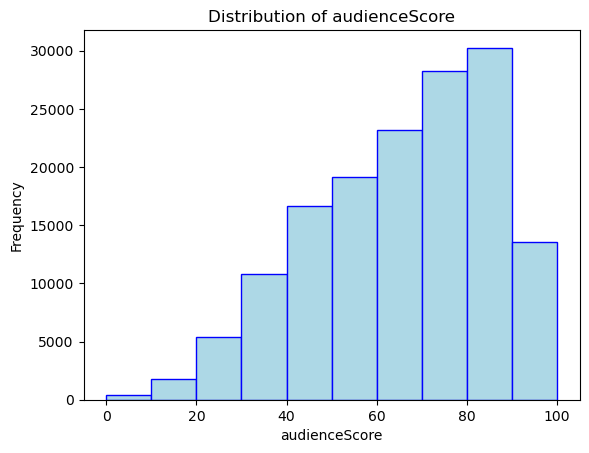

In [46]:
#Plotting the histogram before imputation for audienceScore

plot_histogram(merged_train_data, 'audienceScore', bins=10, edgecolor='blue')

In [47]:
impute_column_with_median(merged_train_data, 'audienceScore')

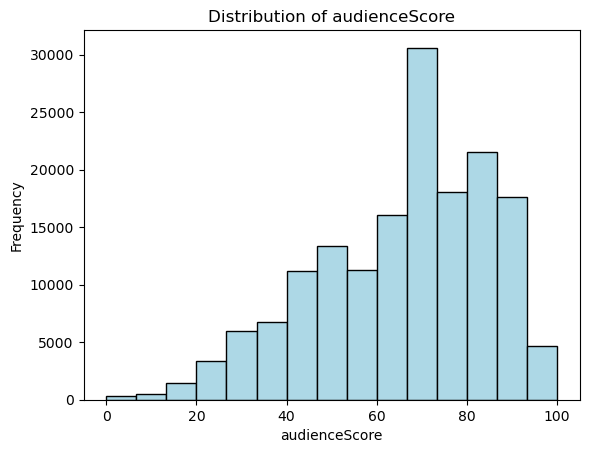

In [48]:
#Plotting the histogram after imputation for audienceScore

plot_histogram(merged_train_data, 'audienceScore', bins=15, edgecolor='Black')

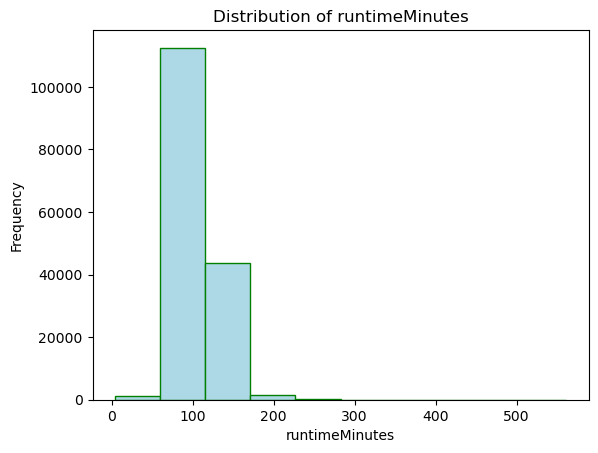

In [49]:
#Plotting the histogram before imputation for runtimeMinutes
plot_histogram(merged_train_data, 'runtimeMinutes', bins=10, edgecolor='green')

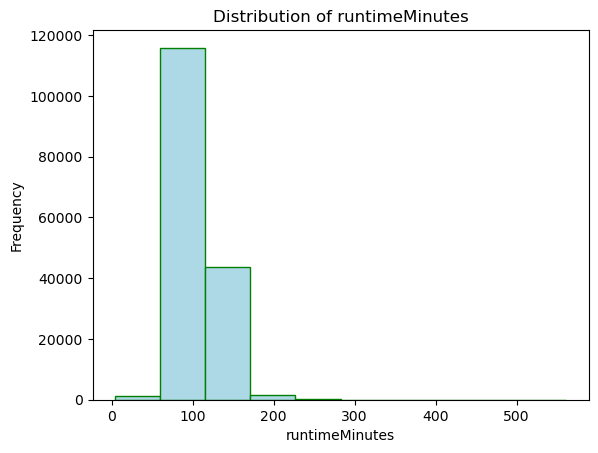

In [50]:
impute_column_with_median(merged_train_data, 'runtimeMinutes')

#Plotting the histogram after imputation for runtimeMinutes
plot_histogram(merged_train_data, 'runtimeMinutes', bins=10, edgecolor='green')

In [51]:
merged_train_data.originalLanguage.value_counts()

originalLanguage
English                     132617
French (France)               3341
English (United Kingdom)      3258
French (Canada)               2241
Japanese                      1904
                             ...  
Gujarati                         3
Slovenian                        2
Somali                           2
Latvian                          1
Azerbaijani                      1
Name: count, Length: 91, dtype: int64

In [52]:
impute_column_with_most_frequent(merged_train_data, 'originalLanguage')

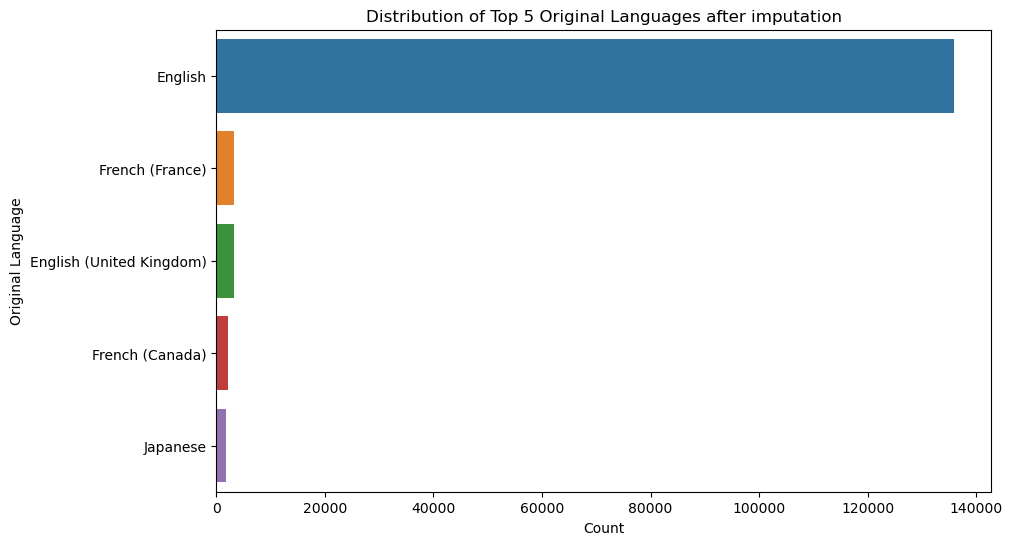

In [53]:
impute_column_with_most_frequent(merged_train_data, 'originalLanguage')

# After imputation

# Get the value counts of each language
language_counts = merged_train_data['originalLanguage'].value_counts()

# Extract the top 5 languages
top_5_languages = language_counts.head(5)

# Plot the countplot for the top 5 languages
plt.figure(figsize=(10, 6))  
sns.countplot(y='originalLanguage', data=merged_train_data, order=top_5_languages.index)

# Set the labels and title
plt.xlabel('Count')
plt.ylabel('Original Language')
plt.title('Distribution of Top 5 Original Languages after imputation')

# Display the plot
plt.show()

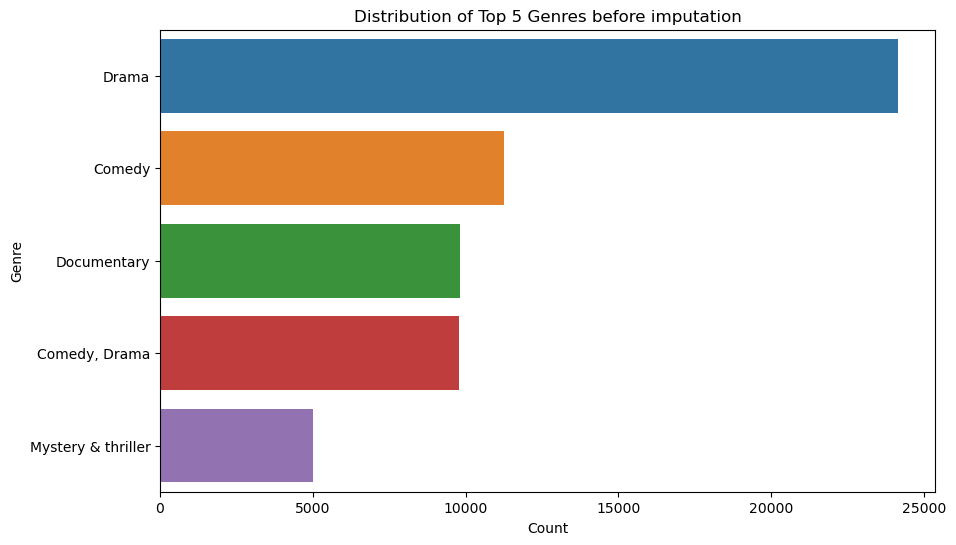

In [54]:
# Before imputation

# Get the value counts of each language
language_counts = merged_train_data['genre'].value_counts()

# Extract the top 5 languages
top_5_languages = language_counts.head(5)

# Plot the countplot for the top 5 languages
plt.figure(figsize=(10, 6))  
sns.countplot(y='genre', data=merged_train_data, order=top_5_languages.index)

# Set the labels and title
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('Distribution of Top 5 Genres before imputation')

# Display the plot
plt.show()

In [55]:

impute_column_with_most_frequent(merged_train_data, 'genre')

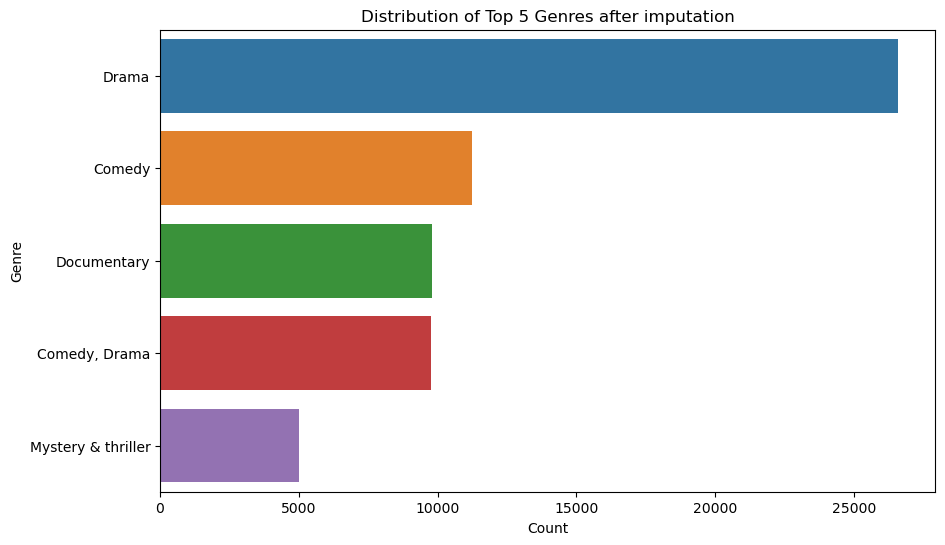

In [56]:
# After  imputation

# Get the value counts of each language
language_counts = merged_train_data['genre'].value_counts()

# Extract the top 5 languages
top_5_languages = language_counts.head(5)

# Plot the countplot for the top 5 languages
plt.figure(figsize=(10, 6))  
sns.countplot(y='genre', data=merged_train_data, order=top_5_languages.index)

# Set the labels and title
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('Distribution of Top 5 Genres after imputation')

# Display the plot
plt.show()

In [57]:
merged_train_data.releaseDateStreaming.value_counts()

releaseDateStreaming
2017-05-22    653
2019-08-27    644
2004-10-12    373
2010-08-17    344
2004-09-07    316
             ... 
2014-10-20      1
2015-12-06      1
2022-02-02      1
2022-05-01      1
2011-06-13      1
Name: count, Length: 2899, dtype: int64

     releaseDateStreaming  movieid
1585           2017-05-22      653
2101           2019-08-27      644
410            2004-10-12      373
823            2010-08-17      344
404            2004-09-07      316
766            2009-11-03      308
2123           2019-10-11      303
1986           2019-02-19      303
654            2008-05-06      291
925            2011-10-11      282


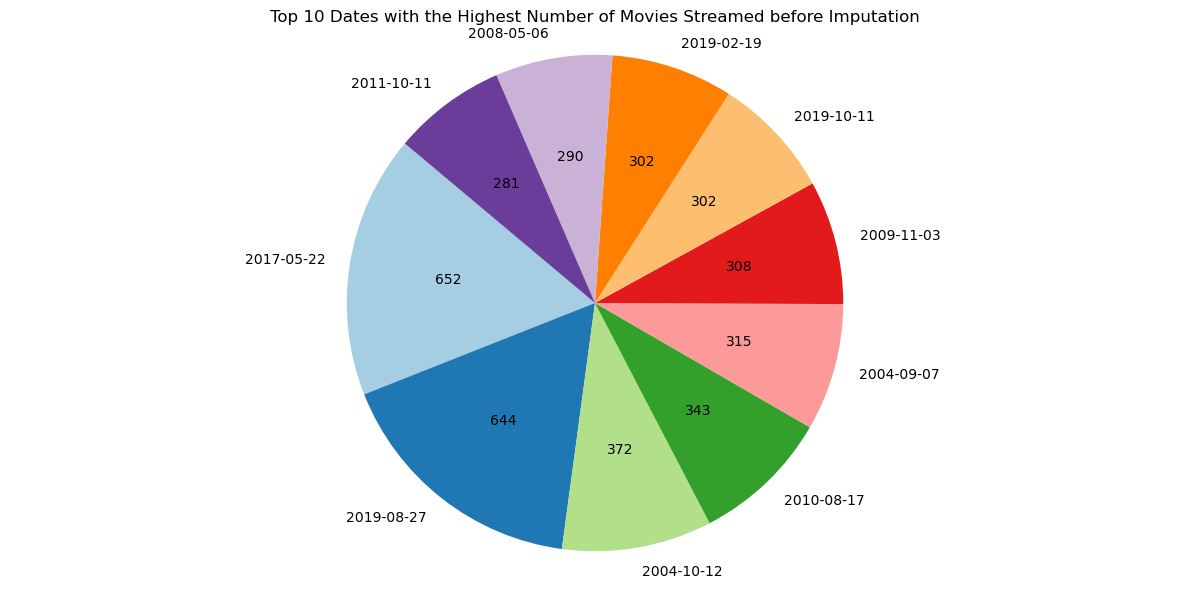

In [58]:
import matplotlib.pyplot as plt

# Group the data by 'releaseDateStreaming' and count the number of movies on each date
movies_streamed_by_date = merged_train_data['movieid'].groupby(merged_train_data['releaseDateStreaming']).count()

# Reset the index to convert the groupby result into a DataFrame
movies_streamed_by_date = movies_streamed_by_date.reset_index()

# Sort the DataFrame by count of movies in descending order
movies_streamed_by_date_sorted = movies_streamed_by_date.sort_values(by='movieid', ascending=False)

# Select the top 10 dates with the highest number of movies streamed
top_10_dates = movies_streamed_by_date_sorted.head(10)

# Display the top 10 dates
print(top_10_dates)

# Custom autopct function to display counts
def absolute_value(val):
    a = int(val/100.*sum(top_10_dates['movieid']))
    return '{:d}'.format(a)

# Creating the pie chart
plt.figure(figsize=(12, 6))
plt.pie(top_10_dates['movieid'], labels=top_10_dates['releaseDateStreaming'], autopct=absolute_value, startangle=140, colors=plt.cm.Paired.colors)
plt.title('Top 10 Dates with the Highest Number of Movies Streamed before Imputation')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()


In [59]:
merged_sentiment_count = merged_train_data['sentiment'].value_counts()
merged_sentiment_count

merged_sentiment_percent = merged_sentiment_count/len(merged_train_data) * 100
merged_sentiment_percent

sentiment
1    66.823751
0    33.176249
Name: count, dtype: float64

### Applying SMOTE to balance the merged movies and train dataset

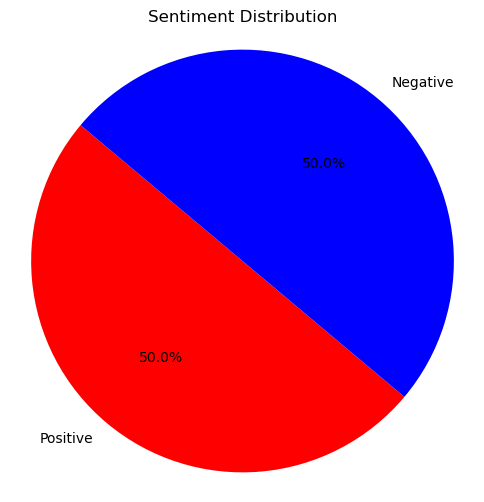

In [60]:
positive_percentage = 50.0
negative_percentage = 50.0

# Data for the pie chart
labels = ['Positive', 'Negative']
sizes = [positive_percentage, negative_percentage]
colors = ['Red', 'Blue']

# Create the pie chart without explode and shadow
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Sentiment Distribution')
plt.show()


### Intuitive EDA

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'How Audience Score affects the sentiment ')

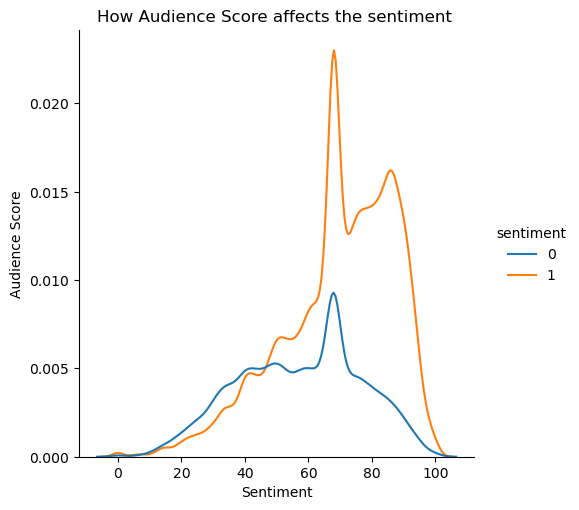

In [61]:
sns.displot(data=merged_train_data, x='audienceScore', hue='sentiment', kind='kde')
# Set the labels and title
plt.xlabel('Sentiment')
plt.ylabel('Audience Score')
plt.title('How Audience Score affects the sentiment ')

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'How runtime Minutes affects the sentiment ')

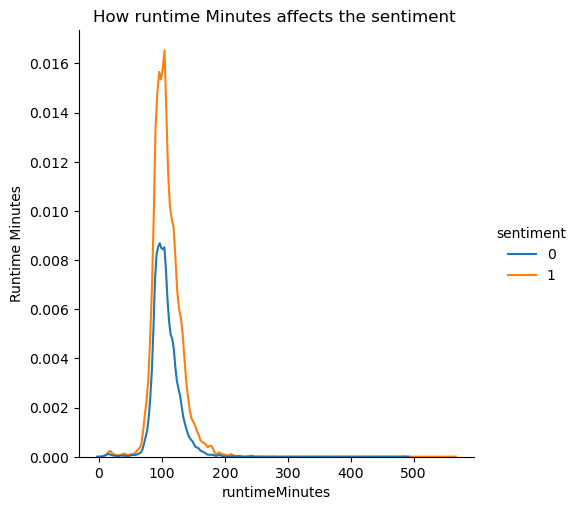

In [63]:
sns.displot(data=merged_train_data, x='runtimeMinutes', hue='sentiment', kind='kde')
# Set the labels and title
plt.ylabel('Runtime Minutes')
plt.title('How runtime Minutes affects the sentiment ')

In [64]:
merged_test_data = pd.merge(test_copy, duplicate_movie, on='movieid', how='left')
merged_test_data.head()

,movieid,reviewerName,isTopCritic,reviewText,title,audienceScore,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director
0,legend_marty_mcfly_oracle,John Kim,0,green slowly cranks dread style occasional sha...,Legend Marty McFly Oracle,57.0,2022-10-14,111.0,"Holiday, Horror, Mystery & thriller",English,Sara Barnett
1,terminator_katniss_everdeen_glimmer,Brian Chaney,0,"philip noyce direction elegant unforced, admir...",Terminator Katniss Everdeen Glimmer,86.0,2003-04-15,94.0,"Drama, Adventure",English,Cindy Flander
2,james_bond_labyrinth_gollum,Danielle Parker,0,path maria ultimately takes... lessen pleasure...,James Bond Labyrinth Gollum,62.0,NaN,NaN,Drama,French,Charlotte Bramble
3,v_quest_han_solo_wondrous,Brittany Lane,0,"pig arthouse john wick synopsis suggest, stran...",V Quest Han Solo Wondrous,84.0,2021-08-03,92.0,"Drama, Mystery & thriller",English,Jean Gainer
4,enigma_hulk_surreal_starlight,Justin Willis,0,imaginative nobudget musical sorts male samese...,Enigma Hulk Surreal Starlight,NaN,NaN,66.0,"Drama, Musical",Arabic,Marvin Short


In [65]:
merged_test_data.shape

(55315, 11)

In [66]:
# Using the same imputations technique used in the merged_train_dataset to handle missing values in merged_train_dataset

impute_column_with_median(merged_test_data, 'audienceScore')

impute_column_with_most_frequent(merged_test_data, 'releaseDateStreaming')

impute_column_with_most_frequent(merged_test_data, 'genre')

impute_column_with_most_frequent(merged_test_data, 'originalLanguage')

impute_column_with_median(merged_test_data, 'runtimeMinutes')


## Scaling our data

In [67]:
# Use MinMax Scaler to scale the runtimeMinutes and audienceScore columns

from sklearn.preprocessing import MinMaxScaler

def min_max_scale(data, column):
    
    # Create the MinMaxScaler
    min_max_scaler = MinMaxScaler()
    
    # Reshape the column into a 2D array
    column_2d = data[column].values.reshape(-1, 1)
    
    # Apply Min-Max Scaling to the column in-place
    data[column] = min_max_scaler.fit_transform(column_2d)


In [68]:
# Scaling the columns of audienceScore, runtimeMinutes for both merged training and test data
min_max_scale(merged_train_data,'audienceScore')
min_max_scale(merged_train_data,'runtimeMinutes')


min_max_scale(merged_test_data,'audienceScore')
min_max_scale(merged_test_data,'runtimeMinutes')


# Splitting our dataset

In [69]:
# splitting the merged dataset into train and test set

merge_train, merge_test = train_test_split(merged_train_data, test_size = 0.2, stratify= merged_train_data.sentiment, random_state = 10)
merge_train.shape, merge_test.shape

((130206, 12), (32552, 12))

In [70]:
positive_train = merge_train[merge_train.sentiment==1]
negative_train = merge_train[merge_train.sentiment==0]


positive_test = merge_test[merge_test.sentiment==1]
negative_test = merge_test[merge_test.sentiment==0]


In [71]:
#Check imbalance

(positive_train.shape,negative_train.shape),(positive_test.shape,negative_test.shape)


(((87009, 12), (43197, 12)), ((21752, 12), (10800, 12)))

In [72]:
positive_train.describe()

,isFrequentReviewer,sentiment,audienceScore,runtimeMinutes
count,87009.000000,87009.0,87009.000000,87009.000000
mean,0.286982,1.0,0.694909,0.185889
std,0.452356,0.0,0.176368,0.040235
min,0.000000,1.0,0.000000,0.001795
25%,0.000000,1.0,0.600000,0.161580
50%,0.000000,1.0,0.710000,0.179533
75%,1.000000,1.0,0.830000,0.206463
max,1.000000,1.0,1.000000,1.000000


In [73]:
negative_train.describe()

,isFrequentReviewer,sentiment,audienceScore,runtimeMinutes
count,43197.000000,43197.0,43197.000000,43197.000000
mean,0.335787,0.0,0.571936,0.182093
std,0.472270,0.0,0.193660,0.036509
min,0.000000,0.0,0.000000,0.000000
25%,0.000000,0.0,0.420000,0.159785
50%,0.000000,0.0,0.590000,0.177738
75%,1.000000,0.0,0.710000,0.199282
max,1.000000,0.0,1.000000,0.863555


In [74]:
positive_test.describe()

,isFrequentReviewer,sentiment,audienceScore,runtimeMinutes
count,21752.000000,21752.0,21752.000000,21752.000000
mean,0.292479,1.0,0.695065,0.186281
std,0.454912,0.0,0.177242,0.041489
min,0.000000,1.0,0.000000,0.010772
25%,0.000000,1.0,0.600000,0.161580
50%,0.000000,1.0,0.710000,0.179533
75%,1.000000,1.0,0.840000,0.206463
max,1.000000,1.0,1.000000,1.000000


In [75]:
negative_test.describe()

,isFrequentReviewer,sentiment,audienceScore,runtimeMinutes
count,10800.000000,10800.0,10800.000000,10800.000000
mean,0.345556,0.0,0.576170,0.181652
std,0.475571,0.0,0.193471,0.037790
min,0.000000,0.0,0.000000,0.001795
25%,0.000000,0.0,0.430000,0.159785
50%,0.000000,0.0,0.590000,0.177738
75%,1.000000,0.0,0.710000,0.199282
max,1.000000,0.0,1.000000,0.863555


In [76]:
merged_train_data= merged_train_data.drop(columns = ['movieid','reviewerName','isFrequentReviewer','title','releaseDateStreaming','genre','originalLanguage','director'],axis=1)
merged_train_data

,reviewText,sentiment,audienceScore,runtimeMinutes
0,henry selick movie coraline. stopmotion master...,1,0.65,0.181329
1,&&93he haphazard story assembled filmmakers co...,0,0.65,0.181329
2,stopmotion artistry wendell &amp wild exquisit...,1,0.65,0.181329
3,wendell &amp wild narratively overstuffed limi...,0,0.65,0.181329
4,netherworlds& it& warm inviting&,1,0.65,0.181329
...,...,...,...,...
162753,"broad shape predictable time it, write final c...",0,0.81,0.192101
162754,formula designed adolescent young adult specta...,1,0.75,0.159785
162755,"years, soft spot heart it, clumsy glory. good ...",0,0.55,0.165171
162756,powerful documentary struggle west virginians ...,1,0.75,0.152603


# Feature Selection

In [77]:
X = merged_train_data[['reviewText', 'audienceScore', 'runtimeMinutes']]
y = merged_train_data['sentiment']


In [78]:
X.shape,y.shape

((162758, 3), (162758,))

In [79]:
# Split the data into training and testing sets with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=10)

In [80]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((130206, 3), (32552, 3), (130206,), (32552,))

## Evaluation metrics functions

In [81]:
def report(X_test, y_test, pipeline):
    # Check if the pipeline has a best_estimator_ attribute (for GridSearchCV)
    if hasattr(pipeline, 'best_estimator_'):
        best_estimator = pipeline.best_estimator_
        y_pred = best_estimator.predict(X_test)
    else:
        y_pred = pipeline.predict(X_test)

    # Print the classification report
    report_text = classification_report(y_test, y_pred)
    print("Classification Report:\n", report_text)
    print("-------------------------------------------------------------")

    # Calculate and print the F1-micro score
    f1_micro = f1_score(y_test, y_pred, average='micro')
    print("F1-micro Score:", f1_micro)
    print("-------------------------------------------------------------")

    # Plot the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()


In [82]:
#Function to plot the ROC curve and ROC AUC score
def plot_roc_curve(y_true, y_prob):
    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_true, y_prob)

    # Calculate ROC AUC score
    roc_auc = roc_auc_score(y_true, y_prob)

    # Plot ROC curve
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")

    # Plot ROC AUC curve
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.fill_between(fpr, tpr, alpha=0.5, color='lightblue')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")

    plt.show()

    # Print ROC AUC score
    print(f"ROC AUC: {roc_auc:.2f}")


In [83]:
def plot_precision_recall_curve_for_pipeline(pipeline, classifier_step, X_train, y_train):
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # Predict probabilities on the training data
    if hasattr(pipeline.named_steps[classifier_step], 'predict_proba'):
        y_scores = pipeline.predict_proba(X_train)[:, 1]
    else:
        y_scores = pipeline.decision_function(X_train)
    
    # Calculate precision-recall values
    precision, recall, _ = precision_recall_curve(y_train, y_scores)
    
    # Calculate area under the curve (AUC)
    pr_auc = auc(recall, precision)
    
    # Plot the precision-recall curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='b', label='Precision-Recall curve (AUC = {:.2f})'.format(pr_auc))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower left')
    plt.grid(True)
    plt.show()




In [84]:
#Precision-Recall curve for Test set

def plot_precision_recall_curve_for_sets(pipeline, classifier_step, X_train, y_train, X_val, y_val):
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # Plot for the training data
    plot_precision_recall_curve(pipeline, classifier_step, X_train, y_train, title='Training Set')
    
    # Plot for the validation data
    plot_precision_recall_curve(pipeline, classifier_step, X_val, y_val, title='Train Set')

def plot_precision_recall_curve(pipeline, classifier_step, X, y, title):
    # Predict probabilities
    if hasattr(pipeline.named_steps[classifier_step], 'predict_proba'):
        y_scores = pipeline.predict_proba(X)[:, 1]
    else:
        y_scores = pipeline.decision_function(X)
    
    # Calculate precision-recall values
    precision, recall, _ = precision_recall_curve(y, y_scores)
    
    # Calculate area under the curve (AUC)
    pr_auc = auc(recall, precision)
    
    # Plot the precision-recall curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='b', label='Precision-Recall curve (AUC = {:.2f})'.format(pr_auc))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve - {}'.format(title))
    plt.legend(loc='lower left')
    plt.grid(True)
    plt.show()

# Feature Extraction

In [87]:
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler

# Define the tfidf_transformer
tfidf_transformer = TfidfVectorizer()

# Define the numeric_transformer
numeric_transformer = MinMaxScaler()

tfidf_column = 'reviewText'  # No list here
numeric_columns = ['audienceScore', 'runtimeMinutes']

preprocessor = ColumnTransformer(
    transformers=[
        ('tfidf', tfidf_transformer, tfidf_column),  # No list here
        ('numeric', numeric_transformer, numeric_columns)
    ])

# Modelling

# Logistic Regression

In [ ]:
from sklearn.pipeline import Pipeline
# Create the pipeline with preprocessor and Linear Regression
pipe_log = Pipeline([
    ('preprocessor', preprocessor),
    ('logit', LogisticRegression(max_iter=1000))
])

# # Define the parameter grid
param_grid_log = {
    'preprocessor__tfidf__max_features': [1000, 5000], 
    'preprocessor__tfidf__ngram_range': [(1, 1)],
    'logit__penalty': ['l1', 'l2'],
    'logit__C': [0.1, 1],
    'logit__fit_intercept': [True, False],
    'logit__solver': ['liblinear','saga'],
    'logit__class_weight': [None],
    'logit__max_iter': [100, 500] # 2 options
}

# # Create the grid search object
grid_search_log = GridSearchCV(pipe_log, param_grid_log, cv=5, verbose=1, scoring='f1') # You can change the scoring to any other appropriate metric

# # Fit the grid search on the training data
grid_search_log.fit(X_train, y_train)


In [ ]:
# # Now you can access the best_params_ and best_estimator_ attributes
best_params = grid_search_log.best_params_
best_estimator = grid_search_log.best_estimator_

In [ ]:
# # Evaluate the best estimator on the test data
score = best_estimator.score(X_test, y_test)
score

In [ ]:
# # Get the predictions for the test data
y_pred = best_estimator.predict(X_test)

In [ ]:
# # Print best hyperparameters and classification report
print("Best Hyperparameters:", best_params)

In [ ]:
Best Hyperparameters: {'logit__C': 1, 'logit__class_weight': None, 'logit__fit_intercept': True, 'logit__max_iter': 100, 'logit__penalty': 'l1', 'logit__solver': 'liblinear', 'preprocessor__tfidf__max_features': 5000, 'preprocessor__tfidf__ngram_range': (1, 1)}

In [ ]:
report(X_test, y_test, grid_search_log)

In [ ]:
import pickle

# # Save the model to a file
with open('best_logistic_model.pkl', 'wb') as f:
 pickle.dump(grid_search_log, f)

# # You can also save the best parameters separately if needed
with open('best_logistic_params.pkl', 'wb') as f:
    pickle.dump(best_params, f)

print("Model and parameters saved successfully!")

In [ ]:
# # Load the model from the file
with open('best_logistic_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# # Load the best parameters from the file
with open('best_logistic_params.pkl', 'rb') as f:
    loaded_best_params = pickle.load(f)

# # You can now use loaded_model and loaded_best_params in your code
print("Loaded Best Hyperparameters:", loaded_best_params)